<a href="https://colab.research.google.com/github/jhoselin48/SSF-Oto25JhoselinMarisolConstantinoEstrada/blob/main/SSF_T10_Constantino_Estrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
from scipy.special import comb
import pandas as pd

Ejercicio A

In [ ]:
# Parámetros
total_alumnos = 40
total_mujeres = 9
alumnos_seleccionados = 3

# Calcular combinaciones
# Formas de seleccionar 3 mujeres de 9
combinaciones_mujeres = comb(total_mujeres, alumnos_seleccionados, exact=True)

# Formas totales de seleccionar 3 alumnos de 40
combinaciones_totales = comb(total_alumnos, alumnos_seleccionados, exact=True)

# Probabilidad
probabilidad = combinaciones_mujeres / combinaciones_totales

print(f"\nTotal de alumnos: {total_alumnos}")
print(f"Total de mujeres: {total_mujeres}")
print(f"Alumnos a seleccionar: {alumnos_seleccionados}")
print(f"\nFormas de seleccionar 3 mujeres de 9: C(9,3) = {combinaciones_mujeres}")
print(f"Formas de seleccionar 3 alumnos de 40: C(40,3) = {combinaciones_totales}")
print(f"\nProbabilidad de que los 3 sean mujeres: {probabilidad:.6f}")
print(f"Probabilidad en porcentaje: {probabilidad*100:.4f}%")


Total de alumnos: 40
Total de mujeres: 9
Alumnos a seleccionar: 3

Formas de seleccionar 3 mujeres de 9: C(9,3) = 84
Formas de seleccionar 3 alumnos de 40: C(40,3) = 9880

Probabilidad de que los 3 sean mujeres: 0.008502
Probabilidad en porcentaje: 0.8502%


Ejercicio B

In [15]:
import random
# Parámetros
num_alumnos = 100
num_cursos = 10
calificacion_min = 5
calificacion_max = 10
""" Sin semilla fija - datos aleatorios diferentes en cada ejecución
Para reproducibilidad: np.random.seed(n), donde n es un número entero cualquiera
"""
# Almacenar resultados
resultados = []

print(f"\nSimulando {num_cursos} cursos con {num_alumnos} alumnos cada uno...")
print(f"Calificaciones aleatorias entre {calificacion_min} y {calificacion_max}\n")

for i in range(num_cursos):
    # Generar calificaciones aleatorias (distribución uniforme)
    calificaciones = [random.randint(calificacion_min, calificacion_max) for _ in range(num_alumnos)]

    # Calcular promedio y varianza
    promedio = np.mean(calificaciones)
    varianza = np.var(calificaciones, ddof=1)  # ddof=1 para varianza muestral

    # Guardar resultados
    resultados.append({
        'Curso': i + 1,
        'Promedio': promedio,
        'Varianza': varianza
    })

    print(f"Curso {i+1:2d} - Promedio: {promedio:.4f}, Varianza: {varianza:.4f}")

# Convertir a DataFrame para mejor visualización
df_resultados = pd.DataFrame(resultados)

print("RESUMEN DE RESULTADOS")
print(df_resultados.to_string(index=False))


Simulando 10 cursos con 100 alumnos cada uno...
Calificaciones aleatorias entre 5 y 10

Curso  1 - Promedio: 7.7700, Varianza: 3.0274
Curso  2 - Promedio: 7.6300, Varianza: 2.9021
Curso  3 - Promedio: 7.4000, Varianza: 3.0909
Curso  4 - Promedio: 7.5200, Varianza: 2.7976
Curso  5 - Promedio: 7.5700, Varianza: 2.8334
Curso  6 - Promedio: 7.4800, Varianza: 3.0400
Curso  7 - Promedio: 7.3400, Varianza: 2.7923
Curso  8 - Promedio: 7.2000, Varianza: 3.0909
Curso  9 - Promedio: 7.2500, Varianza: 2.7955
Curso 10 - Promedio: 7.1400, Varianza: 3.1721
RESUMEN DE RESULTADOS
 Curso  Promedio  Varianza
     1      7.77  3.027374
     2      7.63  2.902121
     3      7.40  3.090909
     4      7.52  2.797576
     5      7.57  2.833434
     6      7.48  3.040000
     7      7.34  2.792323
     8      7.20  3.090909
     9      7.25  2.795455
    10      7.14  3.172121


GRÁFICA: Promedios por curso con barras de error


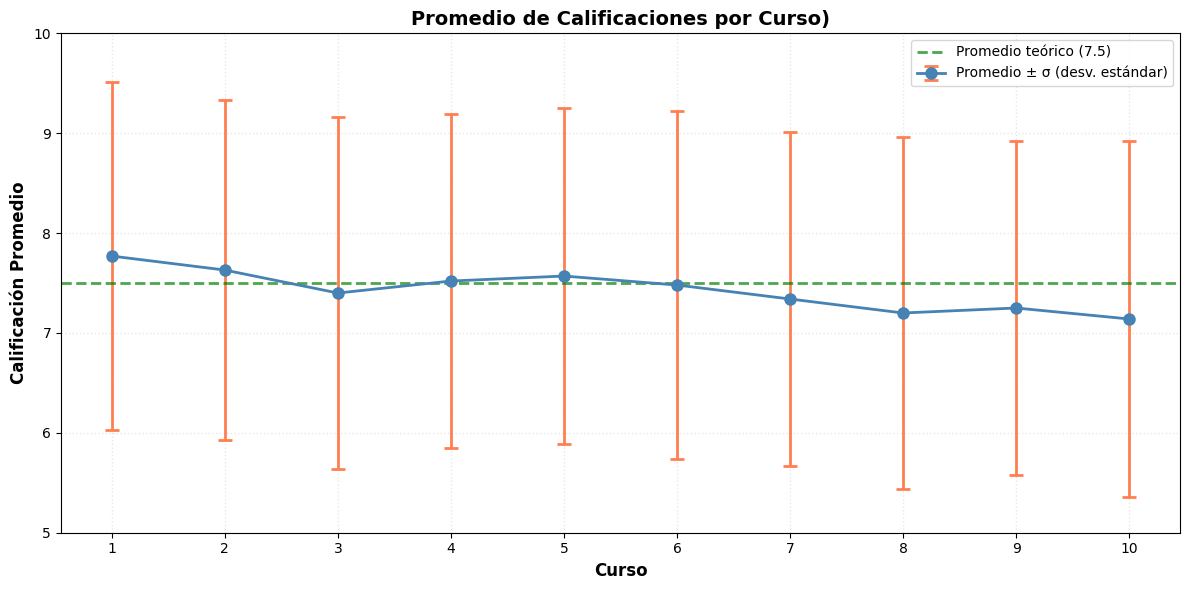


Nota: Las barras de error representan ±1 desviación estándar (σ = √varianza)
Esto indica la dispersión de las calificaciones en cada curso.


In [16]:
import matplotlib.pyplot as plt
# GRÁFICA DE PROMEDIOS CON BARRAS DE ERROR
print("GRÁFICA: Promedios por curso con barras de error")

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Extraer datos
cursos = df_resultados['Curso']
promedios = df_resultados['Promedio']
varianzas = df_resultados['Varianza']

# Desviación estándar = raíz cuadrada de la varianza
desviaciones = np.sqrt(varianzas)

# Gráfica de barras con barras de error
plt.errorbar(cursos, promedios, yerr=desviaciones,
             fmt='o-', markersize=8, capsize=5, capthick=2,
             color='steelblue', ecolor='coral', linewidth=2,
             label='Promedio ± σ (desv. estándar)')

# Línea de referencia del valor teórico esperado (7.5)
plt.axhline(y=7.5, color='green', linestyle='--', linewidth=2,
            alpha=0.7, label='Promedio teórico (7.5)')

# Configuración de la gráfica
plt.xlabel('Curso', fontsize=12, fontweight='bold')
plt.ylabel('Calificación Promedio', fontsize=12, fontweight='bold')
plt.title('Promedio de Calificaciones por Curso)', fontsize=14, fontweight='bold')
plt.xticks(cursos)
plt.ylim(5, 10)
plt.grid(True, alpha=0.3, linestyle=':', linewidth=1)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

print("\nNota: Las barras de error representan ±1 desviación estándar (σ = √varianza)")
print("Esto indica la dispersión de las calificaciones en cada curso.")

Ejercicio C

In [ ]:
# Calcular promedio y desviación estándar de los promedios
promedio_de_promedios = df_resultados['Promedio'].mean()
desv_std_promedios = df_resultados['Promedio'].std(ddof=1)

#ddof=1 cuando N-1

# Calcular promedio y desviación estándar de las varianzas
promedio_de_varianzas = df_resultados['Varianza'].mean()
desv_std_varianzas = df_resultados['Varianza'].std(ddof=1)

print("\nEstadísticas de los promedios de cada curso:")
print(f"  Promedio de los promedios: {promedio_de_promedios:.6f}")
print(f"  Desviación estándar: {desv_std_promedios:.6f}")

print("\nEstadísticas de las varianzas de cada curso:")
print(f"  Promedio de las varianzas: {promedio_de_varianzas:.6f}")
print(f"  Desviación estándar: {desv_std_varianzas:.6f}")

print("INTERPRETACIÓN")
print(f"""
El promedio de los promedios ({promedio_de_promedios:.4f}) debería estar
cercano a 7.5, que es el punto medio entre 5 y 10.

La varianza teórica para una distribución uniforme en [5,10] es:
Varianza = (b-a)²/12 = (10-5)²/12 = 25/12 ≈ 2.0833

El promedio de las varianzas obtenidas ({promedio_de_varianzas:.4f})
debería acercarse a este valor teórico.
""")


Estadísticas de los promedios de cada curso:
  Promedio de los promedios: 7.535087
  Desviación estándar: 0.152375

Estadísticas de las varianzas de cada curso:
  Promedio de las varianzas: 2.132669
  Desviación estándar: 0.125493
INTERPRETACIÓN

El promedio de los promedios (7.5351) debería estar 
cercano a 7.5, que es el punto medio entre 5 y 10.

La varianza teórica para una distribución uniforme en [5,10] es:
Varianza = (b-a)²/12 = (10-5)²/12 = 25/12 ≈ 2.0833

El promedio de las varianzas obtenidas (2.1327) 
debería acercarse a este valor teórico.

